# Score prediction


In [ ]:
# !pip install tensorflow-gpu

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.10.0'

In [3]:
# In colab
# from google.colab import drive
# drive.mount('/content/drive')

## Setting Data
* 데이터를 불러와봅시다.

In [4]:
xy = np.loadtxt("data-01-test-score.csv",  #Set data path
                delimiter=',',
                dtype=np.float32)
print(xy)

x_train = xy[:, 0:-1]  # 모든 row를 가져오로 마지막 컬럼빼고
y_train = xy[:, [-1]]  # 모든 row 가져오고 마지막 컬럼빼고

print(x_train.shape, y_train.shape)


[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]
(25, 3) (25, 1)


## make a dataset

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))


Metal device set to: Apple M1


2023-12-19 16:24:45.880732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-19 16:24:45.881306: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# 가설 설정

In [6]:
W = tf.Variable(tf.random.normal([1, 3], 0, 1), name='weight')
b = tf.Variable(tf.random.normal([1], 0, 1), name='bias')

tf.print(W, b)
print(x_train)
tf.transpose(x_train)

[[-0.0649913102 -0.6812675 0.0452817902]] [-1.35441589]
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]


<tf.Tensor: shape=(3, 25), dtype=float32, numpy=
array([[ 73.,  93.,  89.,  96.,  73.,  53.,  69.,  47.,  87.,  79.,  69.,
         70.,  93.,  79.,  70.,  93.,  78.,  81.,  88.,  78.,  82.,  86.,
         78.,  76.,  96.],
       [ 80.,  88.,  91.,  98.,  66.,  46.,  74.,  56.,  79.,  70.,  70.,
         65.,  95.,  80.,  73.,  89.,  75.,  90.,  92.,  83.,  86.,  82.,
         83.,  83.,  93.],
       [ 75.,  93.,  90., 100.,  70.,  55.,  77.,  60.,  90.,  88.,  73.,
         74.,  91.,  73.,  78.,  96.,  68.,  93.,  86.,  77.,  90.,  89.,
         85.,  71.,  95.]], dtype=float32)>

In [7]:
def linear_regression(features):
    hypothesis = tf.matmul(features, tf.transpose(W)) + b
    return hypothesis


print(linear_regression(x_train))

tf.Tensor(
[[-57.20405 ]
 [-63.138943]
 [-65.058624]
 [-69.82961 ]
 [-47.89271 ]
 [-33.646763]
 [-52.765915]
 [-39.843082]
 [-56.75343 ]
 [-50.192654]
 [-50.221973]
 [-46.835342]
 [-67.998375]
 [-57.68456 ]
 [-52.104355]
 [-63.684364]
 [-54.439636]
 [-63.72158 ]
 [-65.856026]
 [-59.482243]
 [-61.19735 ]
 [-58.777523]
 [-59.119987]
 [-59.62395 ]
 [-66.64969 ]], shape=(25, 1), dtype=float32)


# cost 함수 설정


$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

In [8]:
def loss_fn(hypothesis, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost


optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.00001)

# 학습

In [10]:
epochs = 5000

for step in range(epochs):
    for features, labels in dataset:
        with tf.GradientTape() as tape:  # 미분을 위한 기록
            hypothesis = linear_regression(features)
            loss_value = loss_fn(hypothesis, labels)
        # 여기까지는 반드시 탭으로 들어가야하고

        #여기서부터는 상관없음
        grads = tape.gradient(loss_value, [W, b])  # 실제 미분에 tape객체를 활용
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 48961.8047
Iter: 100, Loss: 10.1661
Iter: 200, Loss: 9.9545
Iter: 300, Loss: 9.7536
Iter: 400, Loss: 9.5628
Iter: 500, Loss: 9.3816
Iter: 600, Loss: 9.2096
Iter: 700, Loss: 9.0461
Iter: 800, Loss: 8.8908
Iter: 900, Loss: 8.7434
Iter: 1000, Loss: 8.6032
Iter: 1100, Loss: 8.4701
Iter: 1200, Loss: 8.3437
Iter: 1300, Loss: 8.2235
Iter: 1400, Loss: 8.1093
Iter: 1500, Loss: 8.0009
Iter: 1600, Loss: 7.8978
Iter: 1700, Loss: 7.7998
Iter: 1800, Loss: 7.7067
Iter: 1900, Loss: 7.6182
Iter: 2000, Loss: 7.5341
Iter: 2100, Loss: 7.4542
Iter: 2200, Loss: 7.3783
Iter: 2300, Loss: 7.3061
Iter: 2400, Loss: 7.2375
Iter: 2500, Loss: 7.1722
Iter: 2600, Loss: 7.1102
Iter: 2700, Loss: 7.0513
Iter: 2800, Loss: 6.9953
Iter: 2900, Loss: 6.9420
Iter: 3000, Loss: 6.8914
Iter: 3100, Loss: 6.8432
Iter: 3200, Loss: 6.7974
Iter: 3300, Loss: 6.7539
Iter: 3400, Loss: 6.7126
Iter: 3500, Loss: 6.6732
Iter: 3600, Loss: 6.6358
Iter: 3700, Loss: 6.6003
Iter: 3800, Loss: 6.5665
Iter: 3900, Loss: 6.5343
Iter: 4

In [106]:
print(W, b)

<tf.Variable 'weight:0' shape=(1, 3) dtype=float32, numpy=array([[0.10910056, 0.73010707, 1.1880596 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-1.3494155], dtype=float32)>


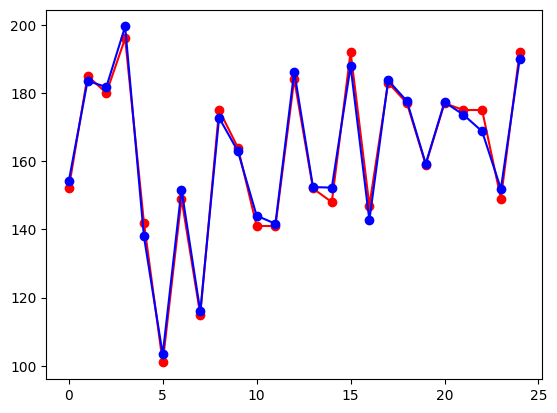

In [107]:
hypothesis = linear_regression(x_train)

plt.plot(y_train, 'o-', color='red')
plt.plot(hypothesis.numpy(), 'o-', color='blue')
plt.show()